In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline


In [2]:
million = pd.read_csv('/Users/mckla/Documents/GitHub/WebAIM-Data/Million.csv', sep=';')

In [3]:
million.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 170 entries, rank to WebFrameworks - ZURB Foundation
dtypes: float64(2), int64(165), object(3)
memory usage: 1.3+ GB


In [24]:
million.head()

,rank,URL,TLD,processtime,totalerrors,totalelements,errordensity,totalalerts,accessrank,doctype,...,Libraries - Zepto,Google Maps,Java,PHP,WebFrameworks - animate.css,WebFrameworks - Bootstrap,WebFrameworks - CodeIgniter,WebFrameworks - Laravel,WebFrameworks - Microsoft ASP.NET,WebFrameworks - ZURB Foundation
0,1,google.com,com,3.21,5,410,0.0122,4,74265,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
1,2,facebook.com,com,4.00,10,595,0.0168,12,135794,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
2,3,youtube.com,com,5.45,43,2056,0.0209,68,439632,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
3,4,twitter.com,com,2.94,37,669,0.0553,13,501528,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
4,5,microsoft.com,com,4.32,0,647,0.0000,11,2396,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#possible target variables  

# Totalerrors / totalelements = errordensity 
#access rank

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(million.isnull().sum())

rank                                 0
URL                                  0
TLD                                  0
processtime                          0
totalerrors                          0
totalelements                        0
errordensity                         0
totalalerts                          0
accessrank                           0
doctype                              0
wcagfail                             0
wcagimgfail                          0
contrast                             0
alt_area_missing                     0
alt_input_missing                    0
alt_link_missing                     0
alt_map_missing                      0
alt_missing                          0
alt_spacer_missing                   0
aria_reference_broken                0
blink                                0
button_empty                         0
heading_empty                        0
label_empty                          0
label_missing                        0
label_multiple           

No null values. nothing to impute or nulls to remove

one hot encode doctype

# After meeting with stakeholder, he stated that we don't need the doctype, so no reason to one hot encode it.

In [11]:
#cat_columns = ['doctype']
#million_processed = pd.get_dummies(million, prefix_sep="__", columns=cat_columns)
#million_processed
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(million_processed.isnull().sum())
#million_processed.shape

# He also stated that error density is probably not the best target variable. He suggested that we look at Error counts or Error averages. 

In [26]:
million.head()

,rank,URL,TLD,processtime,totalerrors,totalelements,errordensity,totalalerts,accessrank,doctype,...,Libraries - Zepto,Google Maps,Java,PHP,WebFrameworks - animate.css,WebFrameworks - Bootstrap,WebFrameworks - CodeIgniter,WebFrameworks - Laravel,WebFrameworks - Microsoft ASP.NET,WebFrameworks - ZURB Foundation
0,1,google.com,com,3.21,5,410,0.0122,4,74265,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
1,2,facebook.com,com,4.00,10,595,0.0168,12,135794,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
2,3,youtube.com,com,5.45,43,2056,0.0209,68,439632,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
3,4,twitter.com,com,2.94,37,669,0.0553,13,501528,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
4,5,microsoft.com,com,4.32,0,647,0.0000,11,2396,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#target = million_processed['errordensity'].squeeze()
#target.shape

In [4]:
error_count = million['totalerrors']

In [11]:
error_count

0           5
1          10
2          43
3          37
4           0
5           1
6          14
7           0
8          12
9         256
10         18
11         12
12          4
13         20
14         46
15         18
16         66
17         16
18         21
19         16
20          9
21         19
22        545
23         77
24          7
25         67
26         64
27          2
28         12
29        140
         ... 
999970     98
999971      4
999972      1
999973     39
999974    158
999975    150
999976     41
999977     29
999978     41
999979     10
999980    225
999981     62
999982     17
999983     30
999984     33
999985     15
999986      1
999987     72
999988     72
999989     70
999990     66
999991    113
999992     22
999993    103
999994     12
999995      8
999996      2
999997      6
999998      3
999999    664
Name: totalerrors, Length: 1000000, dtype: int64

In [12]:
error_count.describe()

count    1000000.000000
mean          59.653607
std          141.359376
min            0.000000
25%           11.000000
50%           32.000000
75%           70.000000
max        26680.000000
Name: totalerrors, dtype: float64

In [13]:
million.head()

,rank,URL,TLD,processtime,totalerrors,totalelements,errordensity,totalalerts,accessrank,doctype,...,Libraries - Zepto,Google Maps,Java,PHP,WebFrameworks - animate.css,WebFrameworks - Bootstrap,WebFrameworks - CodeIgniter,WebFrameworks - Laravel,WebFrameworks - Microsoft ASP.NET,WebFrameworks - ZURB Foundation
0,1,google.com,com,3.21,5,410,0.0122,4,74265,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
1,2,facebook.com,com,4.00,10,595,0.0168,12,135794,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
2,3,youtube.com,com,5.45,43,2056,0.0209,68,439632,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
3,4,twitter.com,com,2.94,37,669,0.0553,13,501528,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
4,5,microsoft.com,com,4.32,0,647,0.0000,11,2396,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0


In [14]:
type(error_count)

pandas.core.series.Series

In [7]:
error_count_df = pd.DataFrame(error_count, index = None)

In [16]:
error_count_df.head()

,totalerrors
0,5
1,10
2,43
3,37
4,0


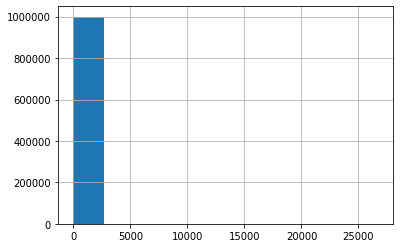

In [17]:
error_count_df['totalerrors'].hist()

In [21]:
error_count_df['cat'] = pd.cut(error_count_df['totalerrors'], bins = [-1, 50, 100, 150, 200, np.inf], labels = [1, 2, 3, 4, 5])

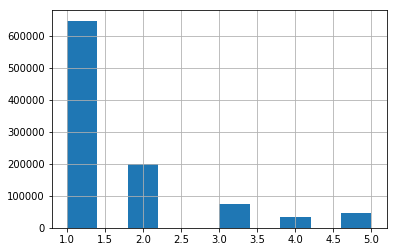

In [22]:
error_count_df['cat'].hist()

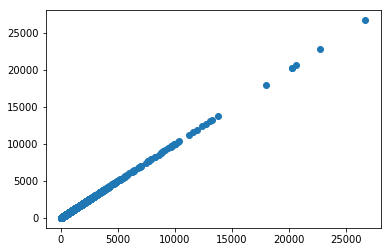

In [23]:
plt.scatter(million['totalerrors'], million['totalerrors'])

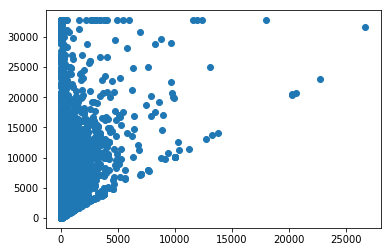

In [24]:
plt.scatter(million['totalerrors'], million['totalelements'])

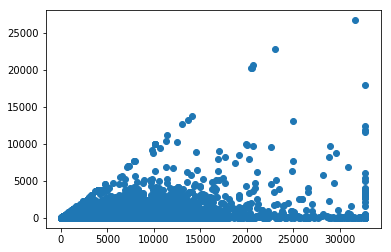

In [25]:
plt.scatter(million['totalelements'], million['totalerrors'])

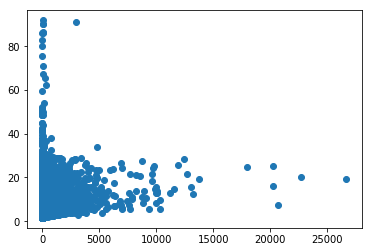

In [26]:
plt.scatter(million['totalerrors'], million['processtime'])

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


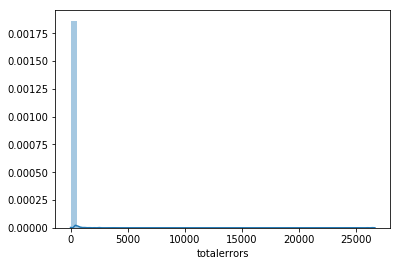

In [27]:
sns.distplot(million['totalerrors'])

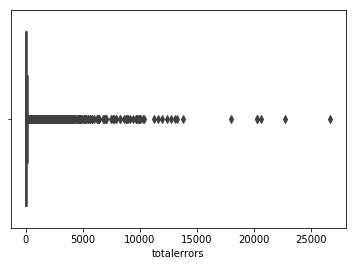

In [28]:
million['totalerrors'].value_counts()
sns.boxplot(million['totalerrors'])

In [29]:
million['totalerrors'].value_counts()

1       40659
2       34898
3       25347
0       21834
6       21766
        ...  
1877        1
1671        1
1159        1
2391        1
1646        1
Name: totalerrors, Length: 2011, dtype: int64

# explanatory features database

In [5]:
million_explanatory = million.drop(['rank', 'URL', 'TLD', 'totalerrors', 'doctype'], axis = 1)

In [5]:
million_explanatory.shape

(1000000, 165)

In [6]:
million_explanatory.head()

,processtime,totalelements,errordensity,totalalerts,accessrank,wcagfail,wcagimgfail,contrast,alt_area_missing,alt_input_missing,...,Libraries - Zepto,Google Maps,Java,PHP,WebFrameworks - animate.css,WebFrameworks - Bootstrap,WebFrameworks - CodeIgniter,WebFrameworks - Laravel,WebFrameworks - Microsoft ASP.NET,WebFrameworks - ZURB Foundation
0,3.21,410,0.0122,4,74265,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.00,595,0.0168,12,135794,1,1,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.45,2056,0.0209,68,439632,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.94,669,0.0553,13,501528,1,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.32,647,0.0000,11,2396,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = million_explanatory.iloc[:10000]
y = error_count_df.iloc[:10000, :1].squeeze()

print('The original input dataset shape is: ', million.shape)
print('The X dataset shape is: ',X.shape)
print('The y dataset shape is: ', y.shape)

The original input dataset shape is:  (1000000, 170)
The X dataset shape is:  (10000, 165)
The y dataset shape is:  (10000,)


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, random_state=0)
print('The X_train dataset shape is: ', X_train.shape)
print('The y_train dataset shape is: ', y_train.shape)
print('The X_test dataset shape is: ', X_test.shape)
print('The y_test dataset shape is: ', y_test.shape)

The X_train dataset shape is:  (7000, 165)
The y_train dataset shape is:  (7000,)
The X_test dataset shape is:  (3000, 165)
The y_test dataset shape is:  (3000,)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score as AUC, log_loss
#from sklearn.calibration import CalibratedClassifierCV

import xgboost as xgb
import lightgbm as lgb

%matplotlib inline

In [21]:
clf = RandomForestRegressor(criterion = 'mse', n_estimators = 10, max_depth = 200, random_state = 0, n_jobs = -1, max_features = 'sqrt')
clf.fit(X_train, y_train)
#predprob_y_rf = clf.predict_proba(X_test)
pred_y_rf = clf.predict(X_test)
#print(pred_y_rf)

#print('The test accuracy is {} and logloss is{}'.format(clf.score(X_test, y_test), log_loss(y_test, predprob_y_rf)))
feature_importances = clf.feature_importances_
importance = sorted(zip(feature_importances, million_explanatory.columns),
                        reverse=True)
print ('most important features:')
[print (row) for i, row in enumerate(importance)]

print('The test accuracy is {}'.format(clf.score(X_test, y_test)))
print('The training accuracy is {}'.format(clf.score(X_train, y_train)))

most important features:
(0.18945503596118515, 'contrast')
(0.15398717032105297, 'accessrank')
(0.14607488764285997, 'errordensity')
(0.10892514608026015, 'totalelements')
(0.043594112708281646, 'totalalerts')
(0.04268707733288076, 'link_empty')
(0.029697060224758317, 'alt_link_missing')
(0.02674809645423618, 'alt_missing')
(0.017480898748554685, 'link_redundant')
(0.014831528687287042, 'processtime')
(0.012987314921277839, 'title_redundant')
(0.012943725039013294, 'ul')
(0.011129142626045016, 'alt')
(0.010905642381178885, 'label_orphaned')
(0.009605739859971615, 'h3')
(0.009102404724031867, 'h2')
(0.007357652676708985, 'wcagimgfail')
(0.006820137046574843, 'alt_null')
(0.0053483014816069225, 'iframe')
(0.005304101503501683, 'alt_suspicious')
(0.005065563038111934, 'label_missing')
(0.004975404754608086, 'totalaria')
(0.004899734111355961, 'h4')
(0.004855761910757359, 'alt_link')
(0.004393501578400691, 'aria_tabindex')
(0.00416507772173833, 'table_layout')
(0.004129364520674734, 'marqu

In [10]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge


train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha",np.logspace(-7,3,3), cv=5)

C:\Users\mckla\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04702e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\mckla\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40055e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\mckla\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.74125e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\mckla\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38141e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\mckla\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.30194e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\mckla\Anaconda3\lib\site-packages\sklearn\linear_model\r

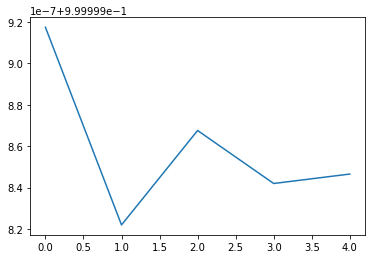

In [31]:
plt.plot(train_scores[0])

In [14]:
valid_scores

array([[0.9999995 , 0.99999999, 0.99999985, 1.        , 0.99999999],
       [0.9999995 , 0.99999999, 0.99999985, 1.        , 0.99999999],
       [0.99997833, 0.99998912, 0.99998834, 0.99990665, 0.9999799 ]])

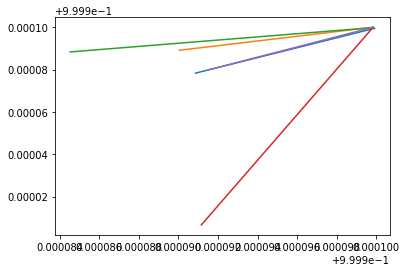

In [16]:
plt.plot(train_scores, valid_scores)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
import time
s=time.time()
clf=RandomForestClassifier(n_estimators=100, max_depth = None, random_state=0,n_jobs=-1,max_features='sqrt')
clf.fit(X_train,y_train)
predprob_y_rf=clf.predict_proba(X_test)# output probabilities for test data
pred_y_rf=clf.predict(X_test)
print('Model fitted in {:.2f} seconds'.format(time.time()-s))
clf.score
clf.classes_
print('Score:', clf.score(X_test, y_test))
#print('classes', clf.classes_)
#print('The test accuracy is {} and logloss is {}'.format(clf.score(X_test,y_test),log_loss(y_test, predprob_y_rf)))

MemoryError: could not allocate 7545552896 bytes

ValueError: y_true and y_pred contain different number of classes 616, 821. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195
  196  197  198  199  200  201  202  203  204  205  206  207  208  209
  210  211  212  213  214  215  216  217  218  219  220  221  222  223
  224  225  226  227  228  229  230  231  232  233  234  235  236  237
  238  239  240  241  242  243  244  245  246  247  248  249  250  251
  252  253  254  255  256  257  258  259  260  261  262  263  264  265
  266  267  268  269  270  271  272  273  274  275  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  318  319  320  321
  322  323  324  325  326  327  328  331  332  333  334  335  336  337
  338  339  340  341  342  343  344  345  346  347  348  349  350  352
  353  355  356  357  358  359  360  361  362  363  364  365  366  367
  368  369  370  371  372  373  374  376  377  378  379  380  381  382
  383  384  385  386  387  388  389  390  391  392  393  394  395  396
  397  398  399  400  401  402  403  404  405  407  408  409  410  411
  412  413  414  415  417  418  420  421  422  424  425  426  427  429
  431  433  434  435  436  437  438  439  440  442  444  445  446  449
  450  451  452  453  454  455  459  460  462  464  466  467  468  469
  471  473  474  476  479  481  482  483  485  488  491  492  493  494
  496  497  501  504  506  507  508  509  512  513  515  516  518  527
  530  531  537  538  539  540  543  544  545  549  551  552  553  554
  557  558  560  561  562  566  569  570  575  576  578  580  582  584
  586  589  590  592  594  596  600  605  607  608  615  619  620  625
  627  632  636  645  646  648  649  653  655  656  661  665  666  670
  674  675  679  682  684  687  691  705  707  713  714  717  726  733
  736  742  758  767  770  771  774  776  777  785  790  792  807  812
  824  839  861  871  880  914  923  940  942  943  951  957  968  976
  978  981  997 1001 1011 1036 1038 1043 1044 1099 1101 1120 1128 1136
 1141 1189 1192 1259 1285 1309 1341 1422 1465 1519 1538 1564 1581 1586
 1645 1809 2032 2042 2282 2327 2329 2752 2887 3734 3757 3792 6826 9144]

In [22]:
import time
s=time.time()
results=[]
for n in range(1,10,2):
    clf=RandomForestClassifier(n_estimators=n, random_state=0,n_jobs=-1)
    clf.fit(X_train,y_train)
    predprob_y=clf.predict_proba(X_test)# output probabilities for test data
    results.append([clf.score(X_train,y_train),clf.score(X_test,y_test),AUC(y_test,clf.predict(X_test)),log_loss(y_test, predprob_y),log_loss(y_train, clf.predict_proba(X_train))])
    #print('Training accuracy is {0} and test accuracy is {1}.'.format(clf.score(x1,y1),clf.score(x2,y2)))
    #print('AUC is {}, and logloss is {}\n'.format(AUC(y2,clf.predict(x2)),log_loss(y2, predprob_y)))

print('Model fitted in {:.2f} seconds'.format(time.time()-s))
result=pd.DataFrame(results,index=range(1,10,2),columns=['train accuracy','test accuracy','AUC','test logloss','train logloss'])  

result.sort_values(by='test accuracy',inplace=True,ascending =False)

result

NameError: name 'RandomForestClassifier' is not defined